# Supervised Logistic Regression for Classification
<hr>

## 0. Import library

In [28]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time
import math

## 1. Load dataset
<hr>

The data features $x_i=(x_{i(1)},x_{i(2)})$ represent 2 exam grades $x_{i(1)}$ and $x_{i(2)}$ for each student $i$.

The data label $y_i$ indicates if the student $i$ was admitted (value is 1) or rejected (value is 0).

In [29]:
# import data with numpy
data = np.loadtxt('dataset.txt', delimiter=',')

# number of training data
n = data.shape[0]
print('Number of training data=',n)

Number of training data= 100


## 2. Explore the dataset distribution
<hr>

Plot the training data points.<br>

You may use matplotlib function `scatter(x,y)`.

In [30]:
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

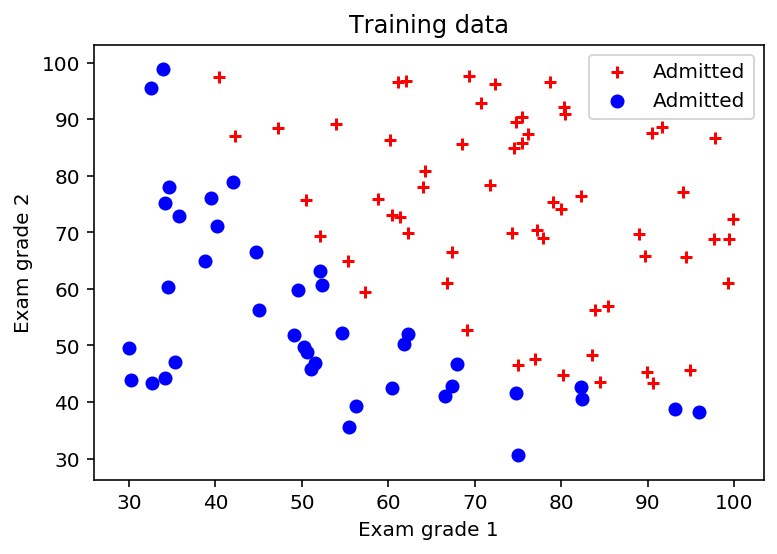

In [46]:
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

# 리스트 분배
x1_admit = [x1[i] for i in range(len(x1)) if idx_admit[i]]
x2_admit = [x2[i] for i in range(len(x2)) if idx_admit[i]]

x1_reject = [x1[i] for i in range(len(x1)) if idx_rejec[i]]
x2_reject = [x2[i] for i in range(len(x2)) if idx_rejec[i]]

plt.scatter(x1_admit, x2_admit, c = 'red', label = 'Admitted', marker = '+')
plt.scatter(x1_reject, x2_reject, c = 'blue', label = 'Admitted', marker = 'o')
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.show()

## 3. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

Define and plot the sigmoid function for values in [-10,10]:

You may use functions `np.exp`, `np.linspace`.

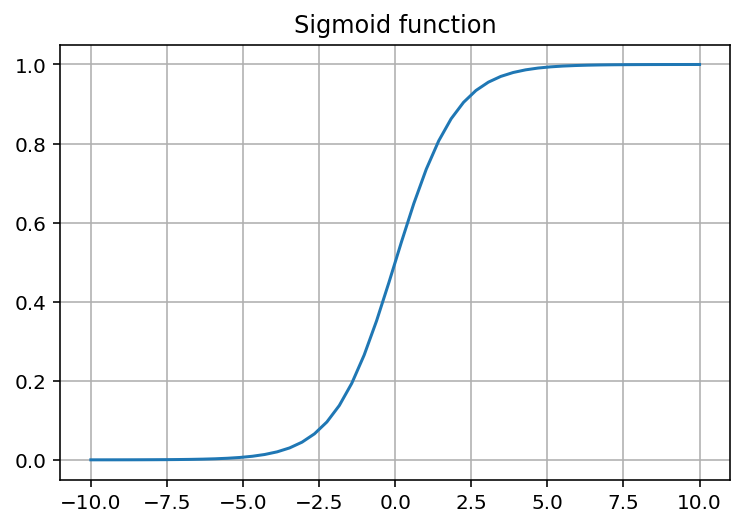

In [47]:
def sigmoid(z):
    
    return 1 / (1 + math.e ** -z)


# plot
x_values = np.linspace(-10,10)

plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 4. Define the prediction function for the classification
<hr>

#### The prediction function is defined by:

$$
\begin{aligned}
p_w(x) = \sigma(w_0 + w_1 x_{(1)} + w_2 x_{(2)}) = \sigma(w^T x)
\end{aligned}
$$

#### Implement the prediction function in a vectorised way as follows:

$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Use the new function `sigmoid`.

In [203]:
# construct the data matrix X
n = np.ones(len(x1))
X = np.array([n, x1, x2])

# parameters vector
w = np.array([0, 0, 0])

# predictive function definition
def f_pred(X,w): 
    
    p = sigmoid(np.dot(X.T, w))
    
    return p

y_pred = f_pred(X,w)

## 5. Define the classification loss function 
<hr>

#### Mean Square Error

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( \sigma( w^T x_i ) - y_i \right)^2
$$

#### Cross-Entropy

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( - y_i \log( \sigma( w^T x_i ) ) - (1 - y_i) \log( 1 - \sigma( w^T x_i ) ) \right)
$$

#### The vectorized representation is for the mean square error is as follows:

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

#### The vectorized representation is for the cross-entropy error is as follows:

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

where

$$
p_w(x)= \sigma(Xw)=
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

You may use numpy functions `.T` and `np.log`.

In [153]:
def mse_loss(label, h_arr):  # mean square error 
    
    return np.mean(np.dot((h_arr - label).T, h_arr - label))

def ce_loss(label, h_arr):  # cross-entropy error
    return np.mean(-((1-label) * np.log(1-h_arr) + label * np.log(h_arr)))

## 6. Define the gradient of the classification loss function 
<hr>

#### Given the mean square loss

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Given the cross-entropy loss

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(p_w(x)-y)
$$

#### Implement the vectorized version of the gradient of the classification loss function

In [197]:
# loss function definition
def grad_loss(y_pred,y, X): 
    
    n = len(y)
    grad_loss = np.dot(X, y_pred - y) / n * 2
    
    return grad_loss

def loss_logreg(y_pred,y): 
    
    n = len(y)
    loss_logreg = np.sum(-((1-y) * np.log(1-y_pred) + y * np.log(y_pred))) / len(y)
    
    return loss_logreg

# Test loss function 
y = data[:,2] # label 
y_pred = f_pred(X,w) # prediction

loss = loss_logreg(y_pred,y)

## 7. Implement the gradient descent algorithm 
<hr>

#### Vectorized implementation for the mean square loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Vectorized implementation for the cross-entropy loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T(p_w(x)-y)
$$

#### Plot the loss values $L(w^k)$ w.r.t. iteration $k$ the number of iterations for the both loss functions.

In [198]:
print(grad_loss(y_pred,y, X)[1:].shape)
w_iters = np.zeros([10,2])
w_iters[1, :] = grad_loss(y_pred,y, X)[1:]
[1,1,1] - 5 * grad_loss(y_pred,y, X)

(2,)


array([  2.        , 121.09216589, 113.62842206])

[2.41881640e-10 1.44450554e-07 7.61524532e-10 5.94410783e-10
 3.50811560e-08 5.28955479e-08 8.47242947e-11 7.44226296e-06
 2.33737981e-09 3.48857699e-05 3.16174485e-04 1.80556397e-04
 3.87673530e-08 1.51978885e-10 5.88450529e-10 1.78869467e-10
 1.19056719e-06 3.57683277e-06 4.51125013e-10 7.37568534e-06
 7.27918110e-06 6.86131665e-07 4.05687012e-07 2.00851537e-07
 1.12303258e-07 1.92878544e-08 1.76402850e-05 2.14133834e-04
 9.48672759e-07 4.96647345e-09 9.97036616e-09 2.57426261e-06
 2.73451458e-08 7.70010744e-09 1.67097219e-09 3.12310818e-07
 3.48575261e-12 2.61000622e-09 1.96825632e-05 4.04172211e-10
 2.57059685e-06 6.69666041e-07 1.15726777e-06 5.08400312e-05
 7.83287604e-07 6.87687374e-07 7.75504934e-08 2.34497838e-08
 8.86381783e-11 8.50372897e-09 4.86729635e-08 4.67838223e-06
 6.61546678e-05 8.13722101e-09 3.27342610e-07 4.12703085e-08
 8.25107650e-07 5.86517084e-12 6.55767140e-08 9.13578925e-09
 3.03690725e-09 1.27456382e-07 4.89685376e-06 4.51754258e-08
 6.68639439e-09 9.517867

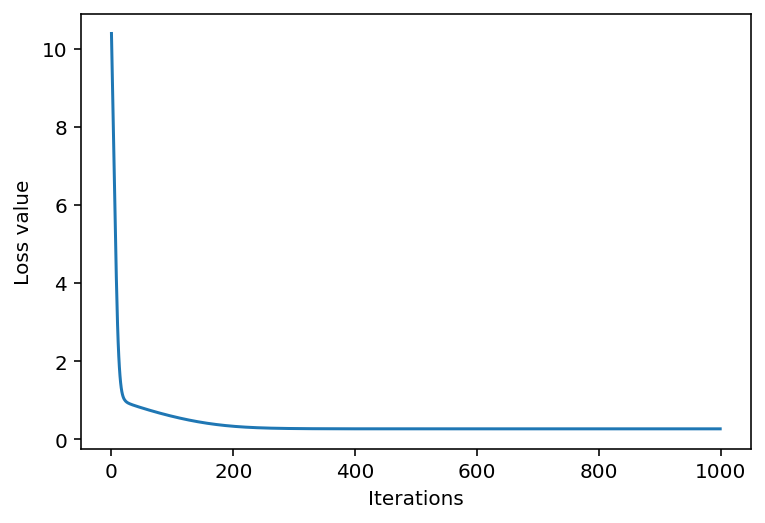

In [208]:
# gradient descent function definition
def grad_desc(X, y , w_init = np.array([0,0,0]) ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w) # linear predicition function  
        grad_f = grad_loss(y_pred, y, X) # gradient of the loss 
        w = w - tau* grad_f # update rule of gradient descent 
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value
        print(grad_f)
        w_iters[i,:] = w[1:] # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])
tau = 1e-4; max_iter = 1000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)


# plot
plt.figure(3)
plt.plot([i for i in range(len(L_iters))], L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


## 8. Plot the decision boundary
<hr>

The decision boundary is defined by all points 

$$
x=(x_{(1)},x_{(2)}) \quad \textrm{ such that } \quad p_w(x) = 0.5
$$

You may use numpy and matplotlib functions `np.meshgrid`, `np.linspace`, `reshape`, `contour`.

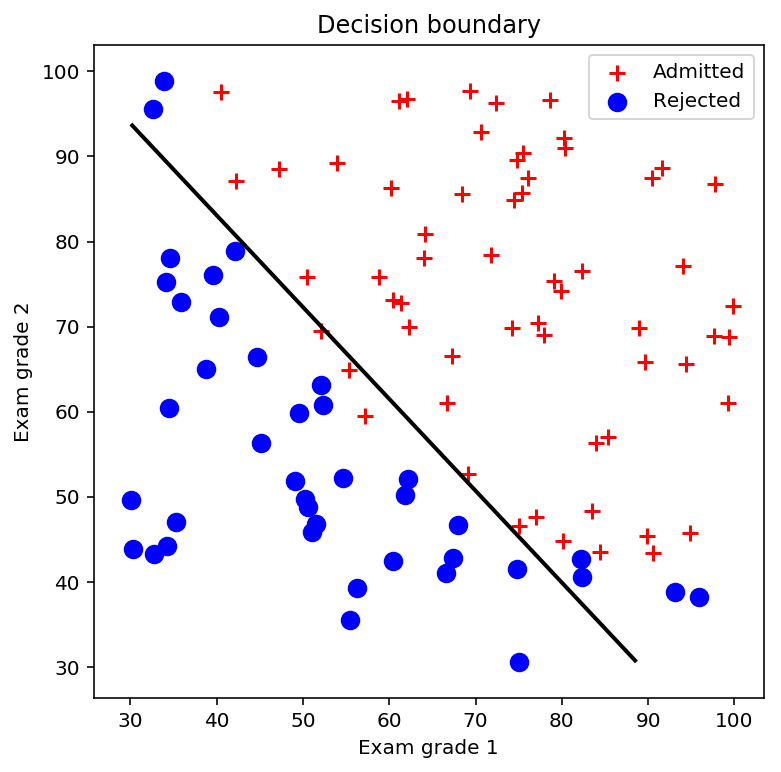

In [25]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape( )


# plot
plt.figure(4,figsize=(6,6))
plt.scatter( ) 
plt.scatter( ) 
plt.contour( ) 
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.title('Decision boundary')
plt.show()

## 9. Comparison with Scikit-learn logistic regression algorithm with the gradient descent with the cross-entropy loss
<hr>

You may use scikit-learn function `LogisticRegression(C=1e6)`.

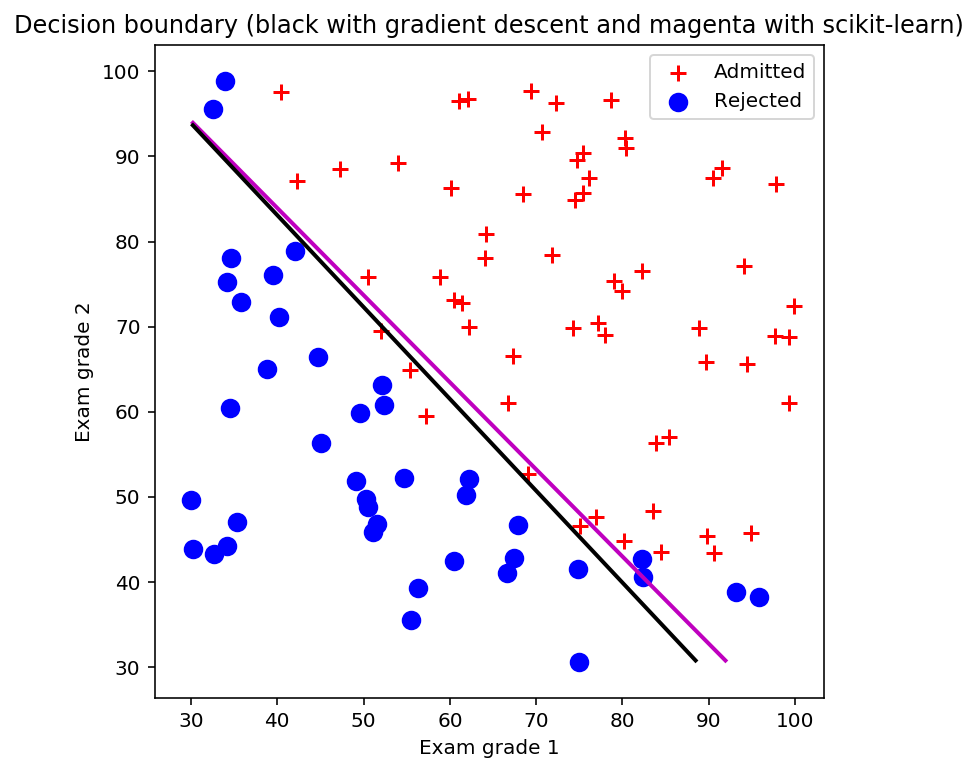

In [69]:
# run logistic regression with scikit-learn
start = time.time()
logreg_sklearn = # scikit-learn logistic regression
logreg_sklearn.fit( ) # learn the model parameters 

# compute loss value
w_sklearn = np.zeros([3,1])
w_sklearn[0,0] = 
w_sklearn[1:3,0] = 
loss_sklearn = loss_logreg( )

# plot
plt.figure(4,figsize=(6,6))
plt.scatter( )
plt.scatter( ) 
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # grade 2

xx1, xx2 = np.meshgrid( ) # create meshgrid

X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)

p = f_pred( )
p = p.reshape( )
plt.contour( );
plt.contour( );

plt.title('Decision boundary (black with gradient descent and magenta with scikit-learn)')
plt.legend()
plt.show()


## 10. Plot the probability map
<hr>

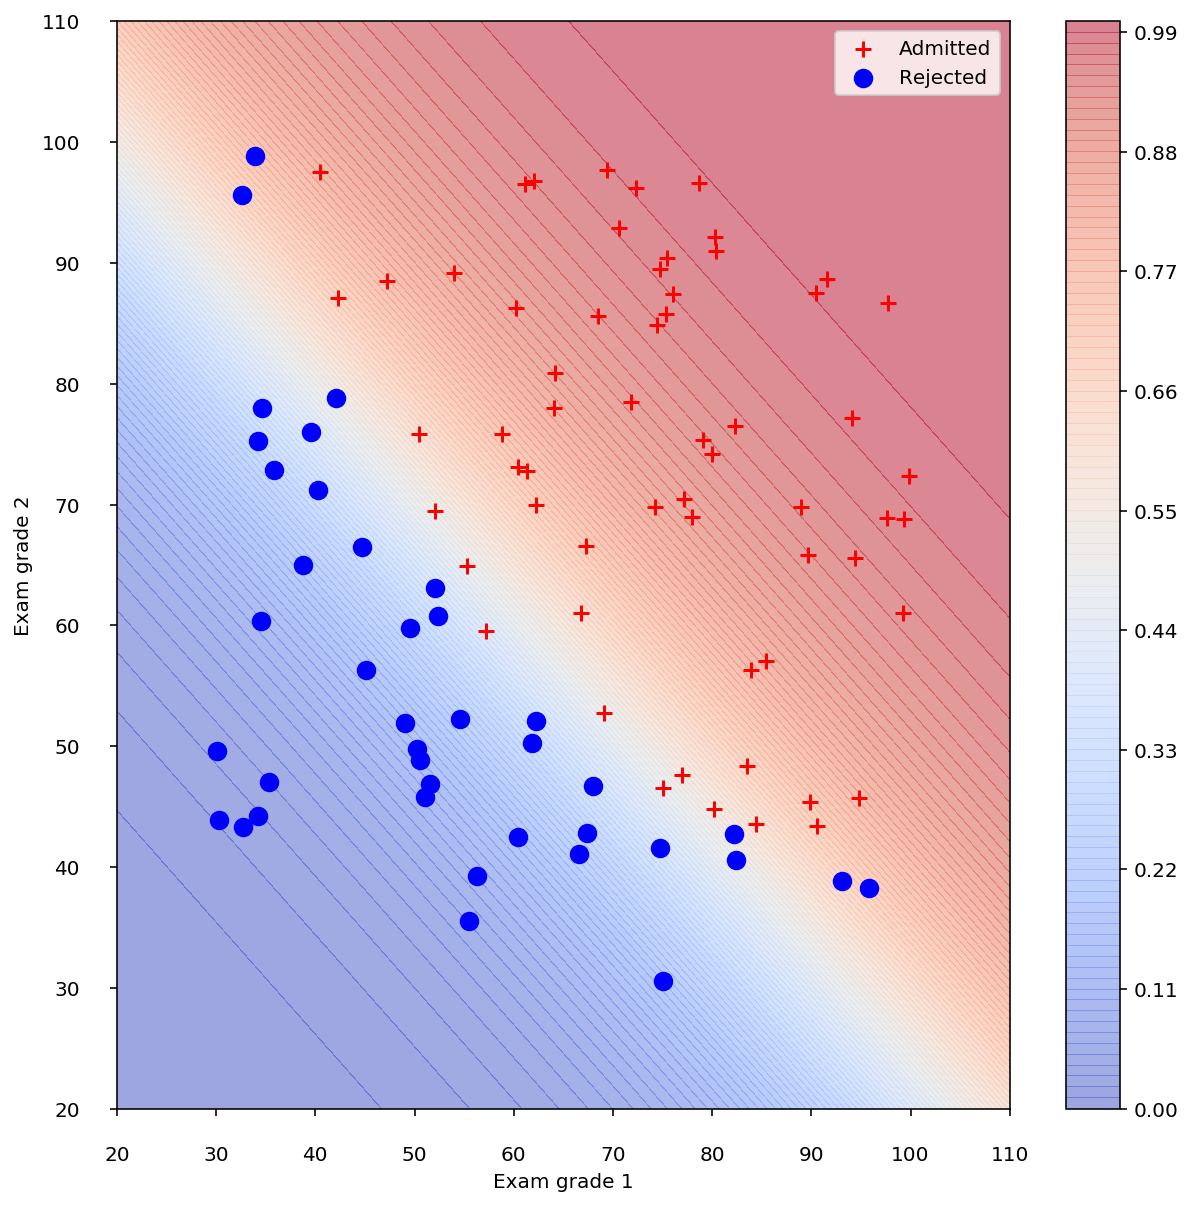

In [68]:
num_a = 110
grid_x1 = np.linspace(20,110,num_a)
grid_x2 = np.linspace(20,110,num_a)

score_x1, score_x2 = np.meshgrid( )

Z = np.zeros( )

for i in range(len(score_x1)):
    for j in range(len(score_x2)):
        
            predict_prob = sigmoid( )

            Z[j, i] = predict_prob
            
            # actual plotting example
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.tick_params( )
ax.set_xlabel('Exam grade 1')
ax.set_ylabel('Exam grade 2')

ax.set_xlim(20, 110)
ax.set_ylim(20, 110)

cf = ax.contourf( )
ax.scatter( ) 
ax.scatter( ) 
cbar = fig.colorbar(cf)
cbar.update_ticks()

plt.legend()
plt.show()

# Output results

## 1. Plot the dataset in 2D cartesian coordinate system (1pt)

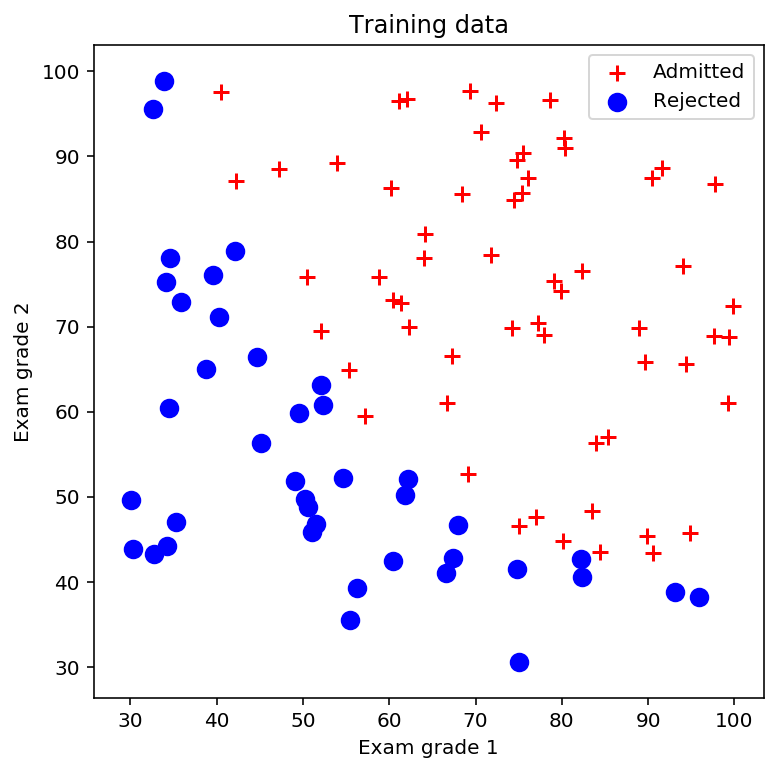

## 2. Plot the sigmoid function (1pt)

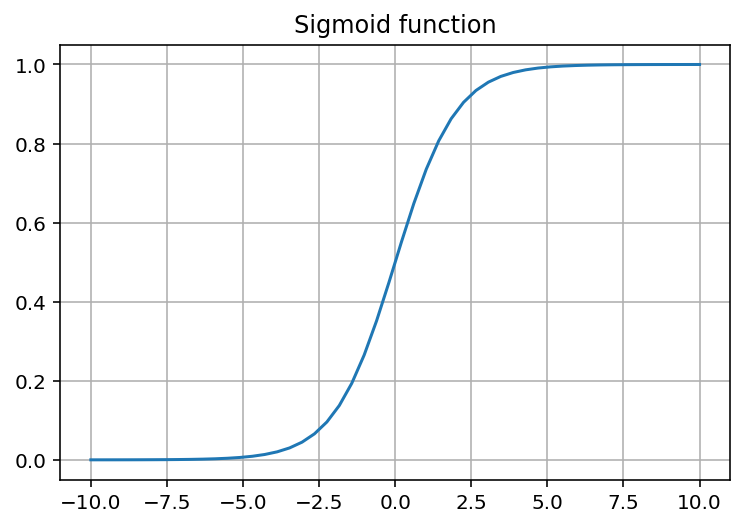

## 3. Plot the loss curve in the course of gradient descent using the mean square error (2pt)

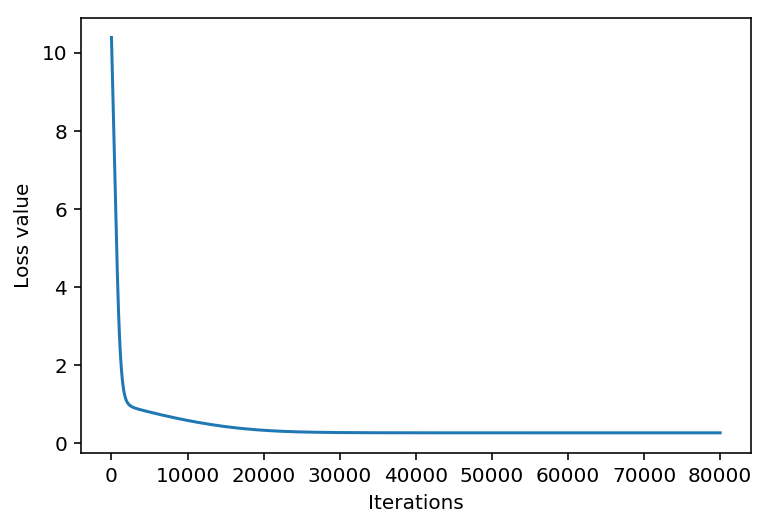

## 4. Plot the loss curve in the course of gradient descent using the cross-entropy error (2pt)

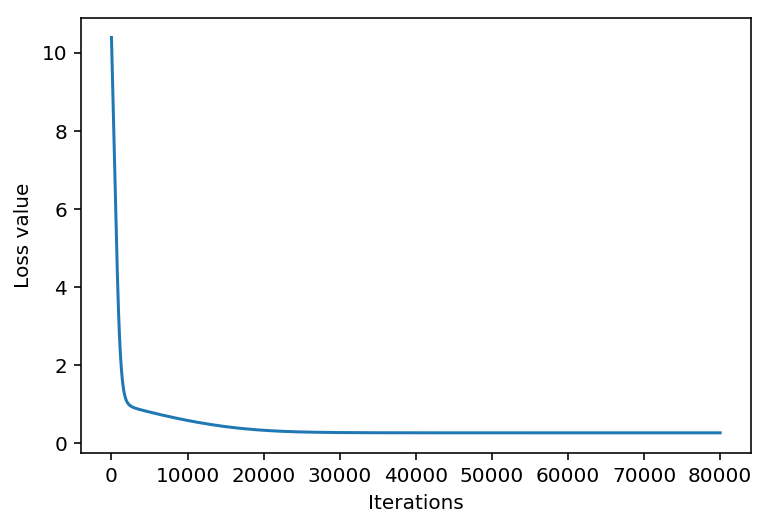

## 5. Plot the decision boundary using the mean square error (2pt)

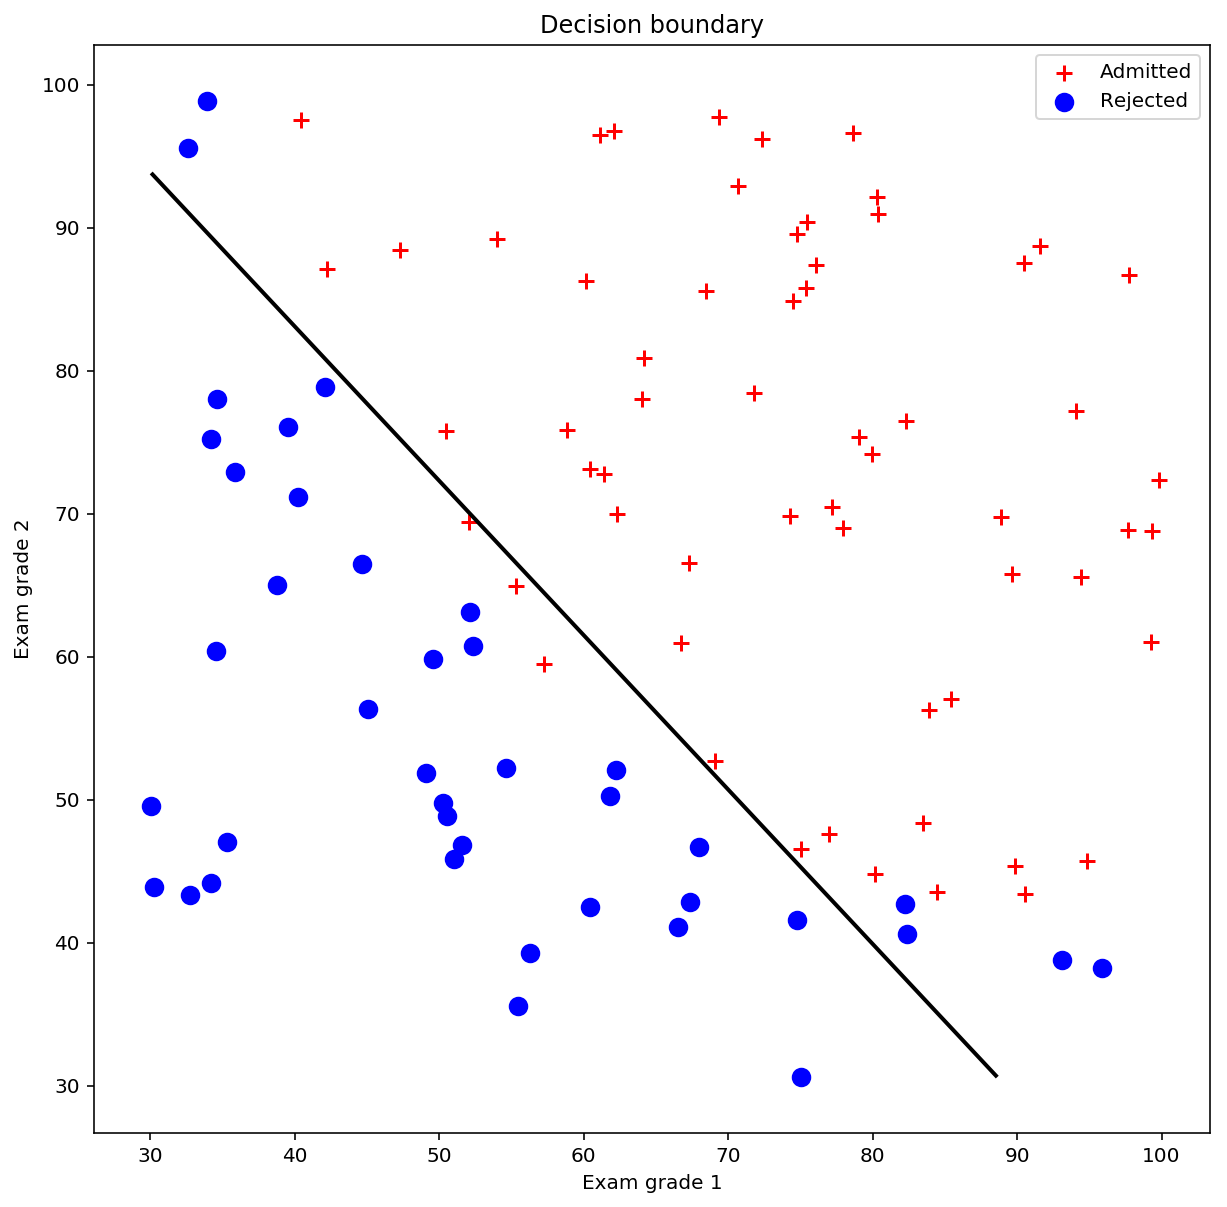

## 6. Plot the decision boundary using the cross-entropy error (2pt)

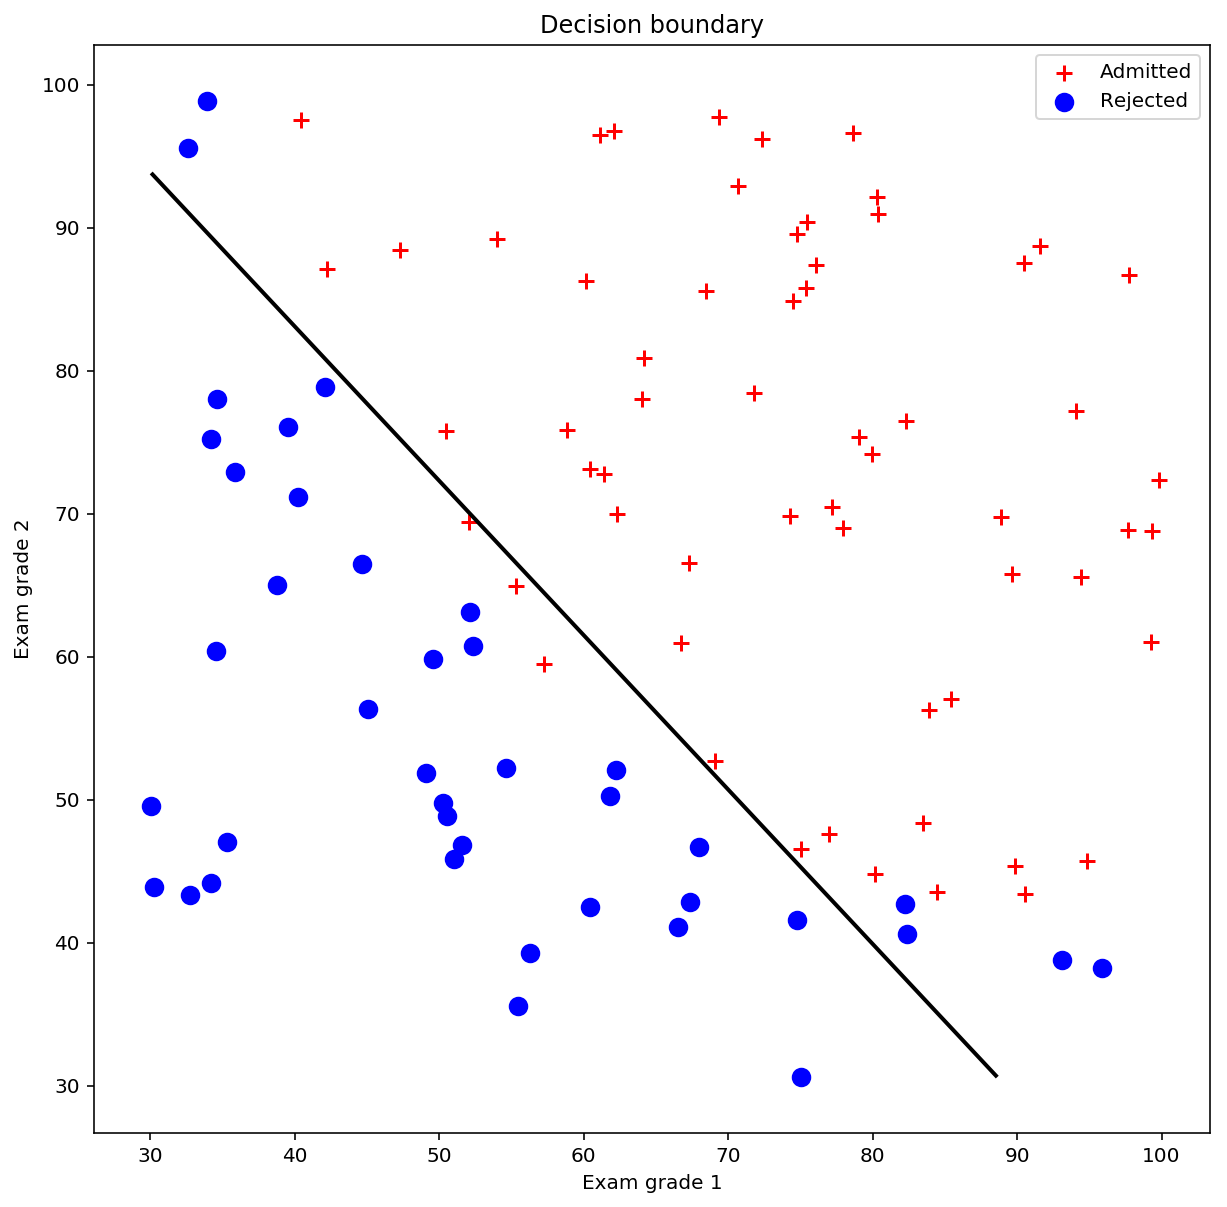

## 7. Plot the decision boundary using the Scikit-learn logistic regression algorithm (2pt)

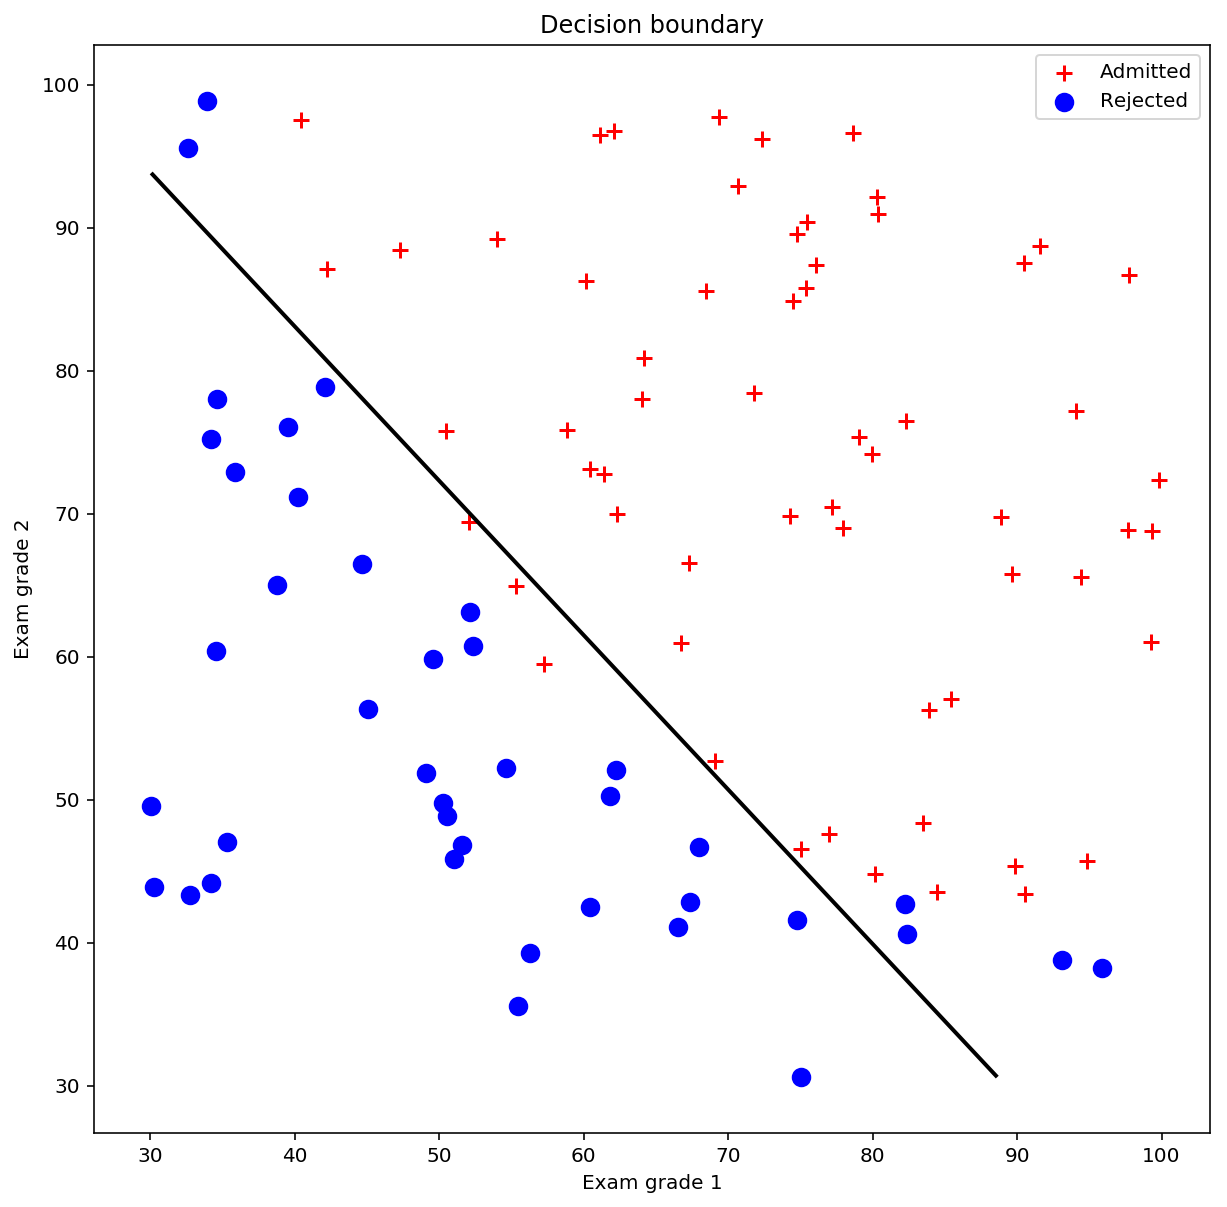

## 8. Plot the probability map using the mean square error (2pt)

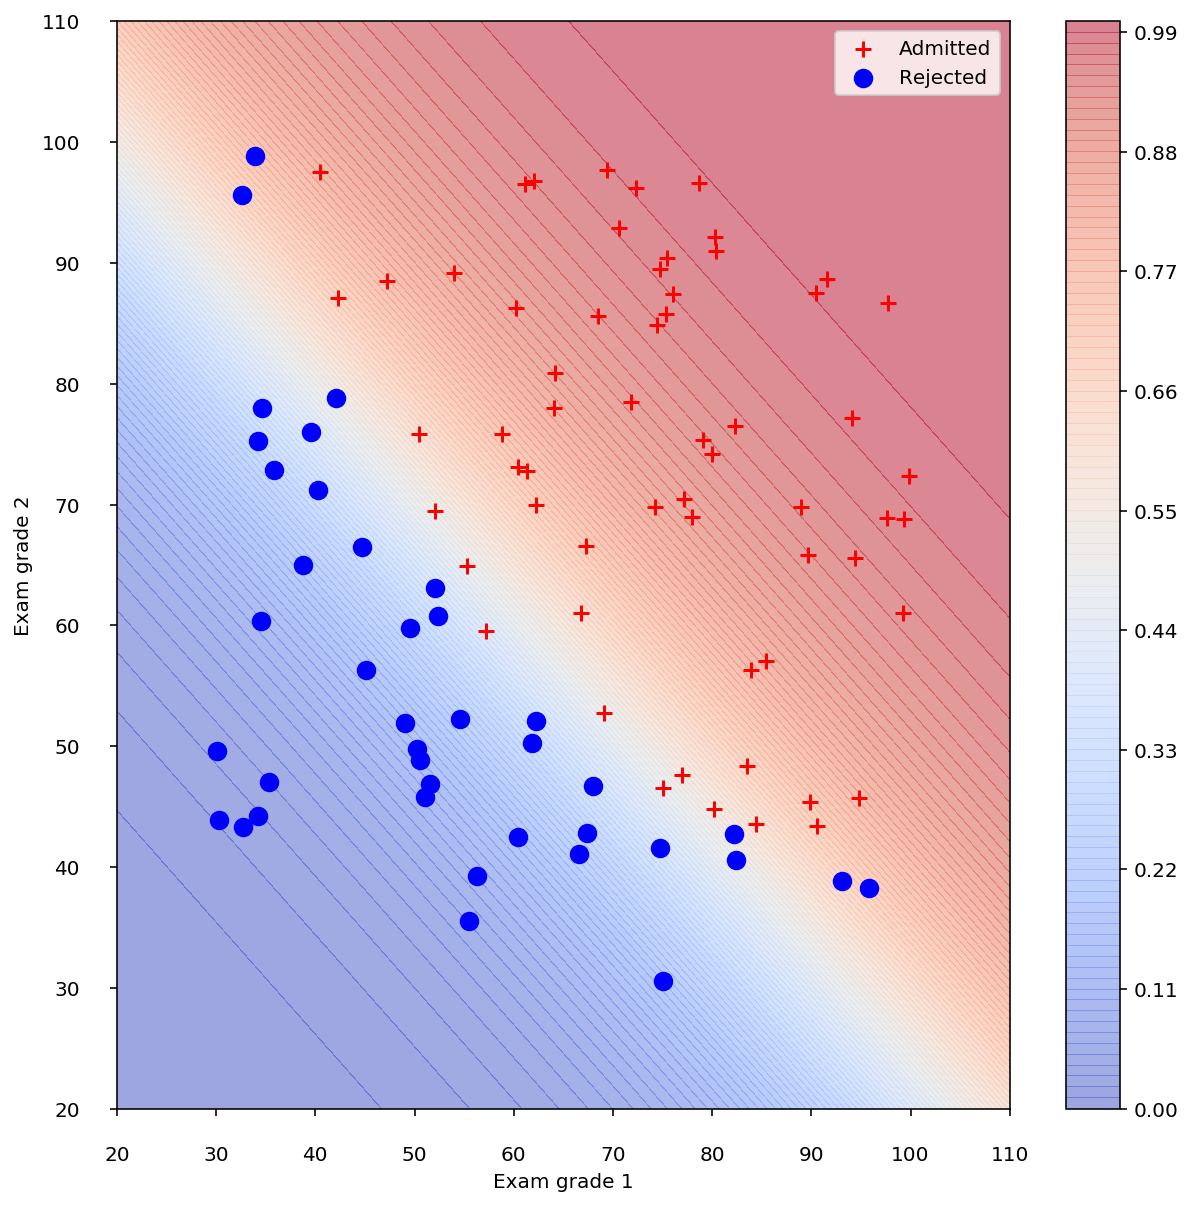

## 9. Plot the probability map using the cross-entropy error (2pt)

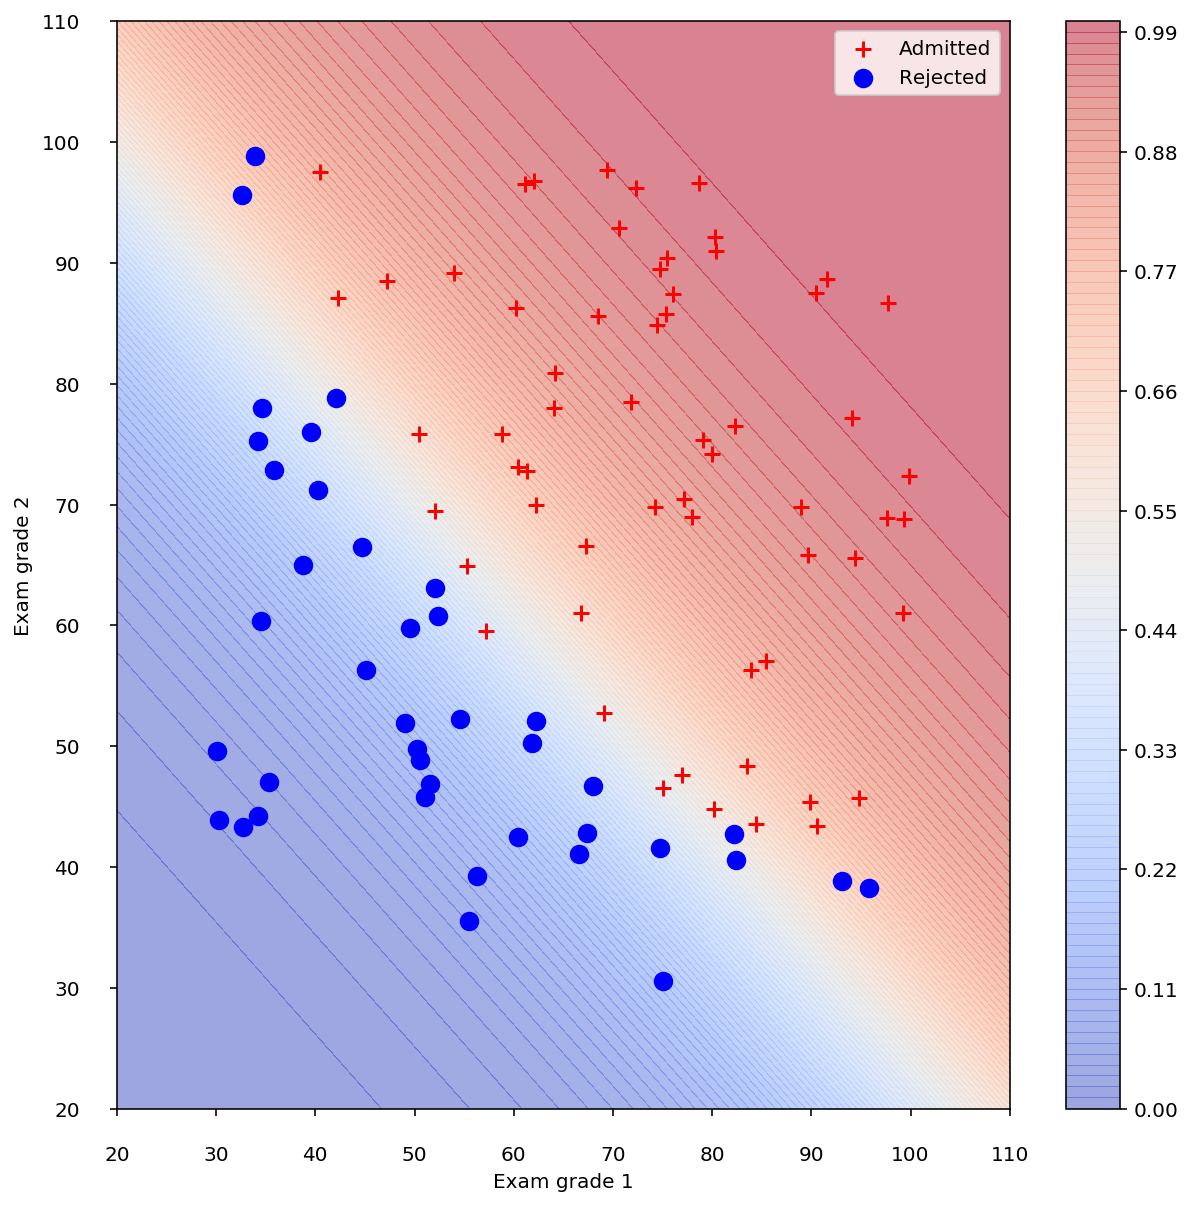